<a href="https://colab.research.google.com/github/KunalAyush1/PyTorch_learning/blob/main/PyTorch1_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
from torch import nn

In [2]:
print(torch.cuda.is_available())



False


In [3]:
!nvidia-smi


/bin/bash: line 1: nvidia-smi: command not found


In [4]:
import sklearn

In [5]:
from sklearn.datasets import make_circles

In [6]:
# Making 1000 samples

n_samples = 1000

X, y = make_circles(n_samples, noise=0.03 , random_state = 42 )

In [7]:
len(X)

1000

In [8]:
len(y)

1000

In [9]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [10]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [11]:
import pandas as pd

In [12]:
circles = pd.DataFrame({"X1": X[:,0],
                       "X2": X[:,1], "label" : y}
                       )


In [13]:
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [14]:
import matplotlib.pyplot as plt

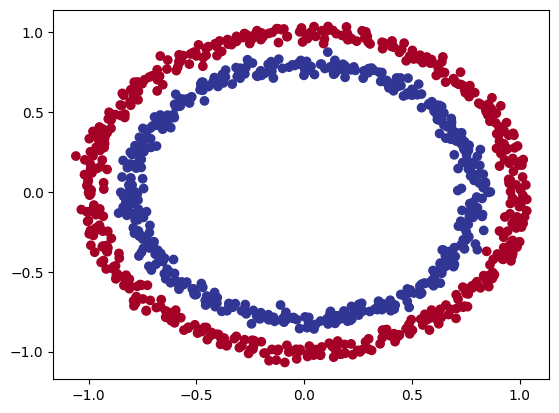

In [15]:
plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap=plt.cm.RdYlBu);

# This dataset is also reffered as Toy Dataset

In [16]:
X.shape


(1000, 2)

In [17]:
y.shape

(1000,)

In [18]:
X_sample = X[0]
y_sample = y[0]

In [19]:
X_sample

array([0.75424625, 0.23148074])

In [20]:
y_sample

np.int64(1)

In [21]:
#turning data into tensors


X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [22]:
type(X) , X.dtype , y.dtype



(torch.Tensor, torch.float32, torch.float32)

In [23]:
#splitting data into training and test sets

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
len(X_train) , len(X_test) , len(y_train) , len(y_test)


(800, 200, 800, 200)

In [25]:
### Building the model

'''
1. Setting up a device agnostic code
2. Construct a model(subclassing nn.Module)
3. Define Loss Function and Optimizer
4. Create a trainign and testing loop


'''

#DEVICE AGNOSTIC CODE

device = "cuda" if torch.cuda.is_available() else "cpu"


In [26]:
device


'cpu'

In [27]:
# Constructing the model

'''
1. Subclass nn.Module
2. Create 2 nn.Lineart() layers that are capable of handling the shapes of our data
3. define a forward() method that outlines the Forward pass
4. Instantiate an instance of ou model class and send it to. the target device


'''

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  def forward(self, x):
    return self.layer_2(self.layer_1(x))

model = CircleModelV0().to(device)

In [28]:
model

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [29]:
next(model.parameters()).device

device(type='cpu')

In [30]:
## we can make network using nn.Sequential very easily


model = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

In [31]:
model

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [32]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.3874, -0.4333],
                      [ 0.4994,  0.6924],
                      [-0.0549,  0.2409],
                      [-0.1610, -0.0150],
                      [-0.1265, -0.2336]])),
             ('0.bias', tensor([-0.0904, -0.2141, -0.4990,  0.1041,  0.5795])),
             ('1.weight',
              tensor([[ 0.1700, -0.1655,  0.3748, -0.0445, -0.2810]])),
             ('1.bias', tensor([0.0571]))])

In [33]:
# setting up a loss function and an optimizer

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.1)

In [34]:
# Accuracy score

def accuracy(y_true,  y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc





In [35]:
#Training model

'''
Step-0 Loop through the data
Step-1 Forward Pass to make predictions on data
Step-2 Calculate the loss
Step-3 Optimizer Zero grad
Step-4 Loss Backward(Back Propagation)
Step-5 use the optimizer to adjust our models parameters to try to improve the loss(Gradient Descent)
'''


### Our model outputs are going to be the raw logits

'''
We can convert  these logits into prediction probabilities by pasing them to some kind of activation function(eg. sigmoiod for Binary Classification and Softmax for multiclass)
Then we can convert our model's prediction probability to prediction lables by either rounding them or taking argmax()
'''

"\nWe can convert  these logits into prediction probabilities by pasing them to some kind of activation function(eg. sigmoiod for Binary Classification and Softmax for multiclass)\nThen we can convert our model's prediction probability to prediction lables by either rounding them or taking argmax()\n"

In [38]:
model.eval()
with torch.inference_mode():
  y_logits = model(X_test.to(device))[:5]
y_logits

tensor([[-0.3009],
        [-0.3076],
        [-0.2711],
        [-0.3094],
        [-0.2517]])

In [40]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [41]:
# using the sigmoid function on our model logits to turn them into probabilities
y_pred_probs =torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4253],
        [0.4237],
        [0.4326],
        [0.4232],
        [0.4374]])

In [42]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [52]:
#Building training and testing loops

torch.manual_seed(42)

epochs = 100

X_train , y_train = X_train.to(device) , y_train.to(device)
X_test , y_test = X_test.to(device) , y_test.to(device)

#training loop

for epoch in range(epochs):
  model.train()

  #forward pass
  y_logits = model(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #loss function
  loss = loss_fn(y_logits, y_train)

  ac = accuracy(y_true=y_train,y_pred= y_pred)

  #optimizer zero grad
  optimizer.zero_grad()

  #loss backward
  loss.backward()

  #optimizer step
  optimizer.step()


  ##Testing
  model.eval()
  with torch.inference_mode():
    test_logits = model(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_ac = accuracy(y_true=y_test,y_pred= test_pred)

    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss : {loss:.5f} | Accuracy : {ac:.2f}% | Test Loss : {test_loss:.5f} | Test accuracy : {test_ac:.2f}% ")


Epoch: 0 | Loss : 0.69298 | Accuracy : 51.00% | Test Loss : 0.69468 | Test accuracy : 46.00% 
Epoch: 10 | Loss : 0.69298 | Accuracy : 51.00% | Test Loss : 0.69468 | Test accuracy : 46.00% 
Epoch: 20 | Loss : 0.69298 | Accuracy : 51.00% | Test Loss : 0.69468 | Test accuracy : 46.00% 
Epoch: 30 | Loss : 0.69298 | Accuracy : 51.00% | Test Loss : 0.69468 | Test accuracy : 46.00% 
Epoch: 40 | Loss : 0.69298 | Accuracy : 51.00% | Test Loss : 0.69468 | Test accuracy : 46.00% 
Epoch: 50 | Loss : 0.69298 | Accuracy : 51.00% | Test Loss : 0.69468 | Test accuracy : 46.00% 
Epoch: 60 | Loss : 0.69298 | Accuracy : 51.00% | Test Loss : 0.69468 | Test accuracy : 46.00% 
Epoch: 70 | Loss : 0.69298 | Accuracy : 51.00% | Test Loss : 0.69468 | Test accuracy : 46.00% 
Epoch: 80 | Loss : 0.69298 | Accuracy : 51.00% | Test Loss : 0.69468 | Test accuracy : 46.00% 
Epoch: 90 | Loss : 0.69298 | Accuracy : 51.00% | Test Loss : 0.69468 | Test accuracy : 46.00% 


In [53]:
## This accuray is not great so lets visualise

## code to import code from some website
import requests

from pathlib import Path

#Dowload helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists


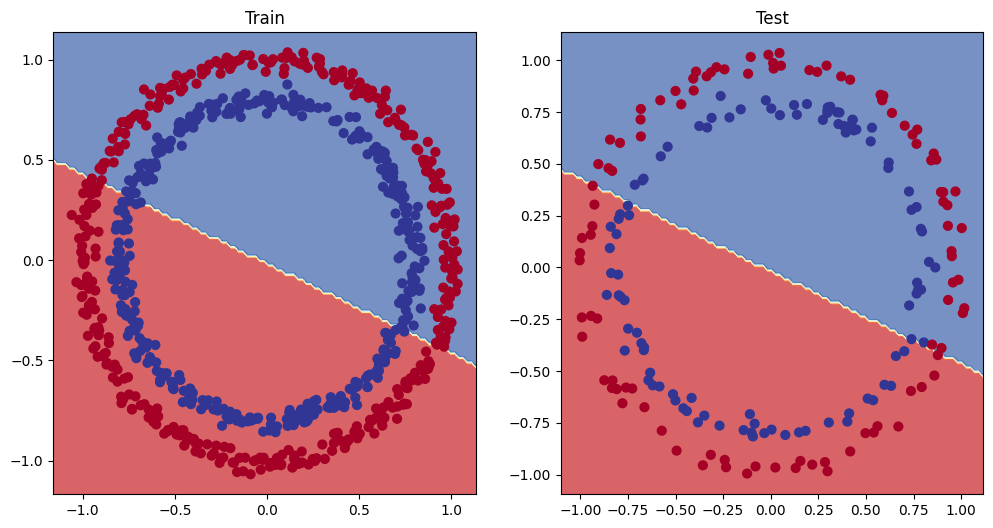

In [54]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

In [55]:
# Improving model
'''

1. Add more layers
2. Add more hidden units
3.Fit for longer
4. Changing the activation functions
5.Changing the learning rate
6. Changing the loss function
'''


#New Model

class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [59]:
# creating a loss function

loss_fn = nn.BCEWithLogitsLoss()

#creating an optimizer

optimizer = torch.optim.SGD(params = model_1.parameters(),  lr = 0.1)


In [60]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [62]:
torch.manual_seed(42)

epochs = 1000

X_train , y_train = X_train.to(device), y_train.to(device)
X_test , y_test = X_test.to(device), y_test.to(device)


for epoch in range(epochs):
  model_1.train()

  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  ac = accuracy(y_true=y_train,y_pred= y_pred)


  optimizer.zero_grad()


  loss.backward()


  optimizer.step()



  model_1.eval()
  with torch.inference_mode():
    test_logits = model(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_ac = accuracy(y_true=y_test,y_pred= test_pred)

    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss : {loss:.5f} | Accuracy : {ac:.2f}% | Test Loss : {test_loss:.5f} | Test accuracy : {test_ac:.2f}% ")



Epoch: 0 | Loss : 0.69298 | Accuracy : 51.00% | Test Loss : 0.69468 | Test accuracy : 46.00% 
Epoch: 100 | Loss : 0.69298 | Accuracy : 51.00% | Test Loss : 0.69468 | Test accuracy : 46.00% 
Epoch: 200 | Loss : 0.69298 | Accuracy : 51.00% | Test Loss : 0.69468 | Test accuracy : 46.00% 
Epoch: 300 | Loss : 0.69298 | Accuracy : 51.00% | Test Loss : 0.69468 | Test accuracy : 46.00% 
Epoch: 400 | Loss : 0.69298 | Accuracy : 51.00% | Test Loss : 0.69468 | Test accuracy : 46.00% 
Epoch: 500 | Loss : 0.69298 | Accuracy : 51.00% | Test Loss : 0.69468 | Test accuracy : 46.00% 
Epoch: 600 | Loss : 0.69298 | Accuracy : 51.00% | Test Loss : 0.69468 | Test accuracy : 46.00% 
Epoch: 700 | Loss : 0.69298 | Accuracy : 51.00% | Test Loss : 0.69468 | Test accuracy : 46.00% 
Epoch: 800 | Loss : 0.69298 | Accuracy : 51.00% | Test Loss : 0.69468 | Test accuracy : 46.00% 
Epoch: 900 | Loss : 0.69298 | Accuracy : 51.00% | Test Loss : 0.69468 | Test accuracy : 46.00% 


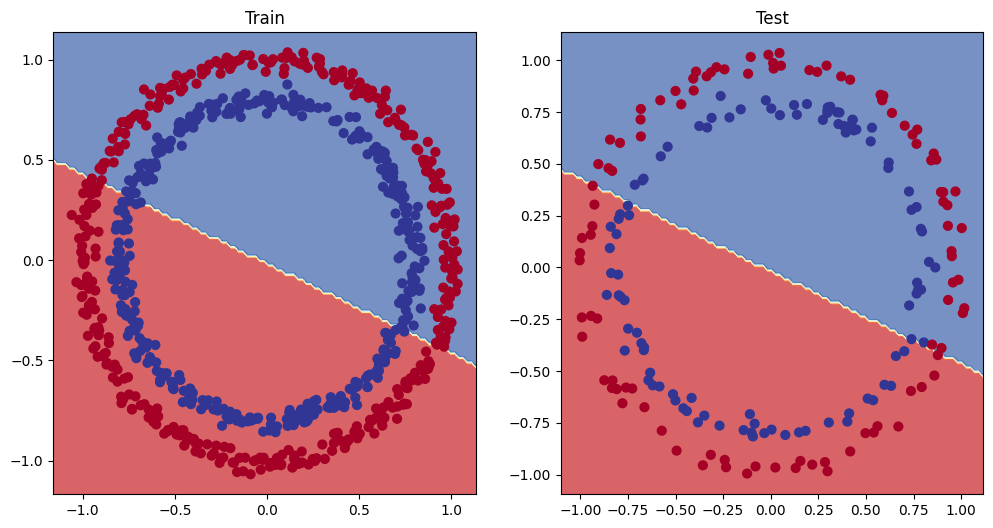

In [63]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

## Our model needs some non-linearity to function better

## **Non_linearity**



In [66]:
# Building a model with non_linear functions

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() ## Non-linear RELU function

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_2 = CircleModelV2().to(device)
model_2







CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [79]:
# Setting up a loss function and an optimizer
from sklearn.metrics import accuracy_score
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(), lr = 0.1)

In [82]:
#Training

torch.manual_seed(42)

epochs = 1000



for epoch in range(epochs):
  model_2.train()

  #forward pass
  y_logits = model_2(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  ac = accuracy(y_true=y_train,y_pred= y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()


  model_2.eval()
  with torch.inference_mode():
    test_logits = model_2(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_ac = accuracy(y_test, test_pred)

    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss : {loss:.5f} | Accuracy : {ac:.2f}% | Test Loss : {test_loss:.5f} | Test accuracy : {test_ac:.2f}% ")


Epoch: 0 | Loss : 0.00378 | Accuracy : 100.00% | Test Loss : 0.69468 | Test accuracy : 99.00% 
Epoch: 100 | Loss : 0.00371 | Accuracy : 100.00% | Test Loss : 0.69468 | Test accuracy : 99.00% 
Epoch: 200 | Loss : 0.00365 | Accuracy : 100.00% | Test Loss : 0.69468 | Test accuracy : 99.00% 
Epoch: 300 | Loss : 0.00358 | Accuracy : 100.00% | Test Loss : 0.69468 | Test accuracy : 99.00% 
Epoch: 400 | Loss : 0.00352 | Accuracy : 100.00% | Test Loss : 0.69468 | Test accuracy : 99.00% 
Epoch: 500 | Loss : 0.00346 | Accuracy : 100.00% | Test Loss : 0.69468 | Test accuracy : 99.00% 
Epoch: 600 | Loss : 0.00340 | Accuracy : 100.00% | Test Loss : 0.69468 | Test accuracy : 99.00% 
Epoch: 700 | Loss : 0.00335 | Accuracy : 100.00% | Test Loss : 0.69468 | Test accuracy : 99.00% 
Epoch: 800 | Loss : 0.00330 | Accuracy : 100.00% | Test Loss : 0.69468 | Test accuracy : 99.00% 
Epoch: 900 | Loss : 0.00324 | Accuracy : 100.00% | Test Loss : 0.69468 | Test accuracy : 99.00% 


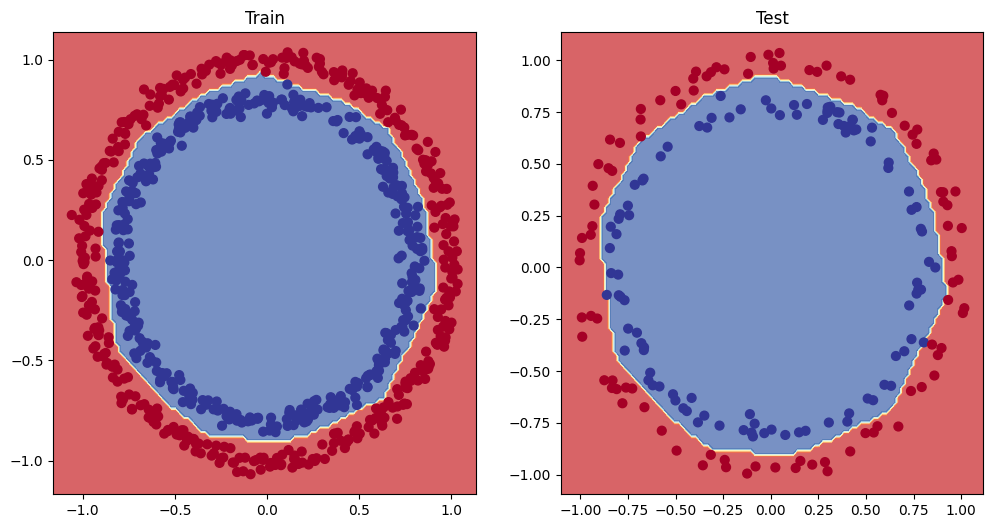

In [83]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_2, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test)

### Yayyy We have achieved 99 % accuracy on test data and 100 % on training data!!!!!!